In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [3]:
# Create a sample messy dataset
data = {
    'age': [25, 25, 30, np.nan, 22, 35, 45, np.nan, 50, 32, 28],
    'income': [50000, 50000, 70000, 60000, np.nan, 80000, 90000, 55000, np.nan, 72000, 63000],
    'gender': ['M','M', 'F', 'M', 'F', 'F', 'M', np.nan, 'M', 'F', np.nan],
    'education': ['Bachelors', 'Bachelors', 'Masters', 'PhD', 'Bachelors', np.nan, 'Masters', 'PhD', 'Bachelors', np.nan, 'Masters'],
    'satisfaction': [7, 7, 8, 5, 9, 6, 3, 8, 10, 7, np.nan],
    'customer_id': ['C001','C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010'],
    'signup_date': ['2023-01-15','2023-01-15', '2023-03-20', '2022-12-05', '2023-02-10', '2023-05-22', 
                    '2023-04-30', '2023-01-25', '2022-11-15', '2023-06-07', '2023-03-12']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())

Original DataFrame:
    age   income gender  education  satisfaction customer_id signup_date
0  25.0  50000.0      M  Bachelors           7.0        C001  2023-01-15
1  25.0  50000.0      M  Bachelors           7.0        C001  2023-01-15
2  30.0  70000.0      F    Masters           8.0        C002  2023-03-20
3   NaN  60000.0      M        PhD           5.0        C003  2022-12-05
4  22.0      NaN      F  Bachelors           9.0        C004  2023-02-10

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           9 non-null      float64
 1   income        9 non-null      float64
 2   gender        9 non-null      object 
 3   education     9 non-null      object 
 4   satisfaction  10 non-null     float64
 5   customer_id   11 non-null     object 
 6   signup_date   11 non-null     object 
dtypes: float64(3), object(4)
memory

In [4]:
# Step 1: Handle date columns - convert to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
print("\n After date conversion:")
print(df['signup_date'].head())


 After date conversion:
0   2023-01-15
1   2023-01-15
2   2023-03-20
3   2022-12-05
4   2023-02-10
Name: signup_date, dtype: datetime64[ns]


In [5]:
# Step 2: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
age             2
income          2
gender          2
education       2
satisfaction    1
customer_id     0
signup_date     0
dtype: int64


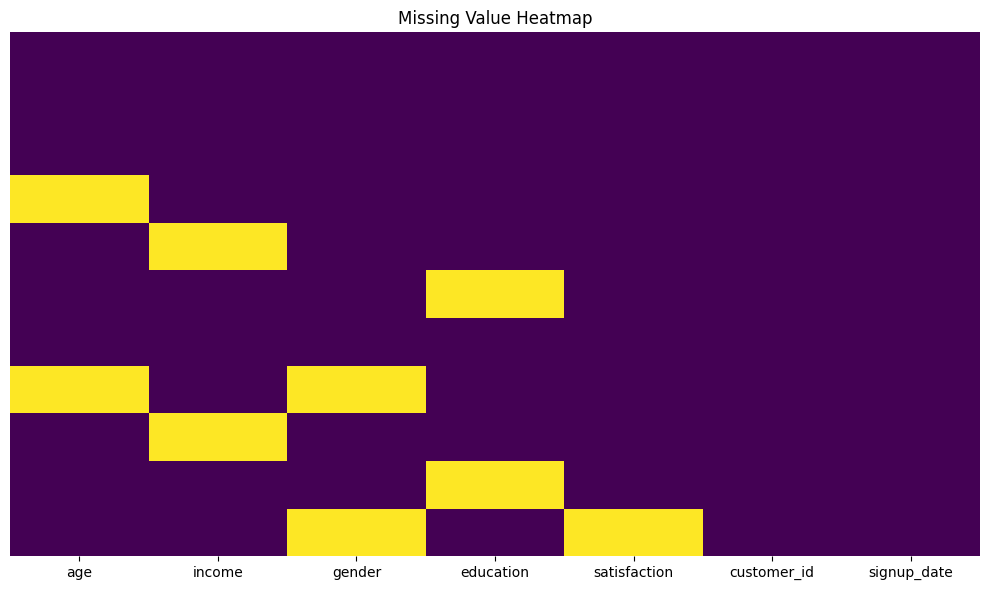

In [6]:
# Step 3: Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.tight_layout()
plt.show()


In [8]:
# Step 4: Handle duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print("Before remove")
print(df.head())
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed")

print("After remove")
print(df.head())

Number of duplicate rows: 0
Before remove
    age   income gender  education  satisfaction customer_id signup_date
0  25.0  50000.0      M  Bachelors           7.0        C001  2023-01-15
2  30.0  70000.0      F    Masters           8.0        C002  2023-03-20
3   NaN  60000.0      M        PhD           5.0        C003  2022-12-05
4  22.0      NaN      F  Bachelors           9.0        C004  2023-02-10
5  35.0  80000.0      F        NaN           6.0        C005  2023-05-22
After remove
    age   income gender  education  satisfaction customer_id signup_date
0  25.0  50000.0      M  Bachelors           7.0        C001  2023-01-15
2  30.0  70000.0      F    Masters           8.0        C002  2023-03-20
3   NaN  60000.0      M        PhD           5.0        C003  2022-12-05
4  22.0      NaN      F  Bachelors           9.0        C004  2023-02-10
5  35.0  80000.0      F        NaN           6.0        C005  2023-05-22


0     50000.0
2     70000.0
3     60000.0
5     80000.0
6     90000.0
7     55000.0
9     72000.0
10    63000.0
Name: income, dtype: float64
0    50000.0
2    70000.0
3    60000.0
4        NaN
5    80000.0
Name: income, dtype: float64


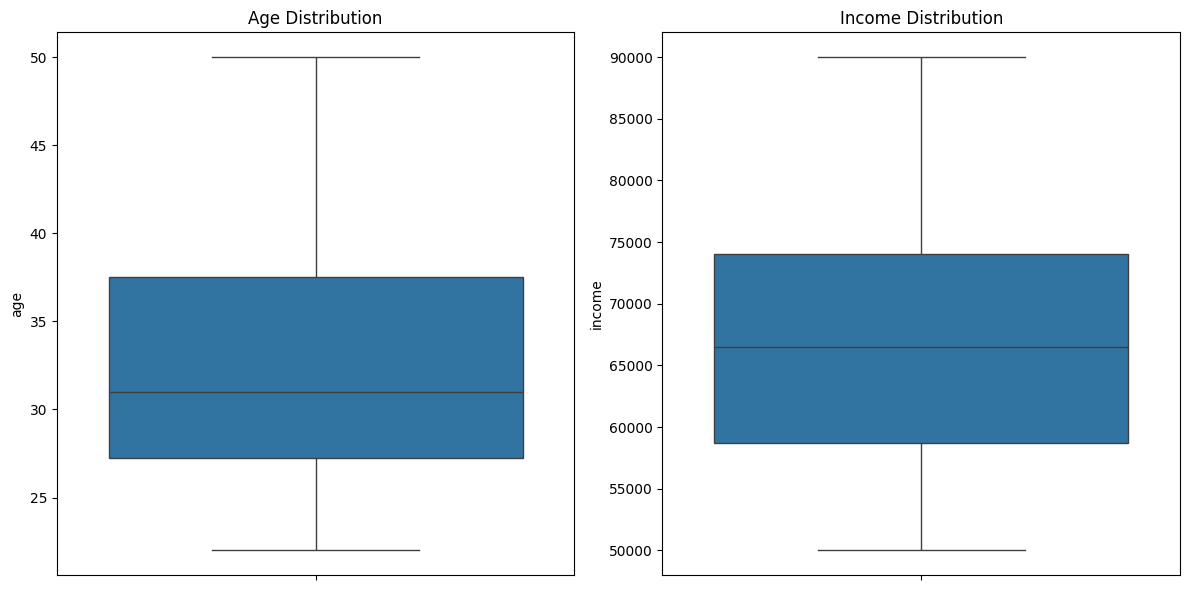

In [12]:
# Step 5: Check for outliers in numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'].dropna())
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
print(df['income'].dropna())
print(df['income'].head())
sns.boxplot(y=df['income'].dropna())
plt.title("Income Distribution")
plt.tight_layout()
plt.show()


In [14]:
# Step 6: Handle missing values
# 6.1: For numerical columns - impute with mean
num_imputer = SimpleImputer(strategy='mean')
df[['age', 'income']] = num_imputer.fit_transform(df[['age', 'income']])

# 6.3: For satisfaction - impute with median since it's an ordinal variable
df['satisfaction'] = df['satisfaction'].fillna(df['satisfaction'].median())

print("\nAfter handling missing values:")
print(df.isnull().sum())


After handling missing values:
age             0
income          0
gender          2
education       2
satisfaction    0
customer_id     0
signup_date     0
dtype: int64


In [18]:
# Step 7: Feature engineering
# 7.1: Create new feature - days since signup

today = pd.to_datetime('2025-04-23')
df['days_since_signup'] = (today - df['signup_date']).dt.days

# 7.2: Create age groups
bins = [0, 25, 35, 50, 100]
labels = ['18-25', '26-35', '36-50', '>50']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print("\nAfter feature engineering")
print(df.head())


After feature engineering
      age   income gender  education  satisfaction customer_id signup_date  \
0  25.000  50000.0      M  Bachelors           7.0        C001  2023-01-15   
2  30.000  70000.0      F    Masters           8.0        C002  2023-03-20   
3  33.375  60000.0      M        PhD           5.0        C003  2022-12-05   
4  22.000  67500.0      F  Bachelors           9.0        C004  2023-02-10   
5  35.000  80000.0      F        NaN           6.0        C005  2023-05-22   

   days_since_signup age_group  
0                829     26-35  
2                765     26-35  
3                870     26-35  
4                803     18-25  
5                702     36-50  


In [21]:
# Step 8: Encoding categorical variables
# 8.1: One-hot encoding for education
encoded_education = pd.get_dummies(df['education'], prefix='edu')
df = pd.concat([df, encoded_education], axis=1)

# 8.2: Label encoding for gender (simple mapping)
df['gender_code'] = df['gender'].map({'M': 0, 'F': 1})
print("\nAfter encoding:")
print(df.head())


After encoding:
      age   income gender  education  satisfaction customer_id signup_date  \
0  25.000  50000.0      M  Bachelors           7.0        C001  2023-01-15   
2  30.000  70000.0      F    Masters           8.0        C002  2023-03-20   
3  33.375  60000.0      M        PhD           5.0        C003  2022-12-05   
4  22.000  67500.0      F  Bachelors           9.0        C004  2023-02-10   
5  35.000  80000.0      F        NaN           6.0        C005  2023-05-22   

   days_since_signup age_group  edu_Bachelors  edu_Masters  edu_PhD  \
0                829     26-35           True        False    False   
2                765     26-35          False         True    False   
3                870     26-35          False        False     True   
4                803     18-25           True        False    False   
5                702     36-50          False        False    False   

   gender_code  
0          0.0  
2          1.0  
3          0.0  
4          1.0  
5 